<a href="https://colab.research.google.com/github/YooungJune/Beginner_DL_Galaxy_Classification/blob/main/astro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!wget http://www.astro.utoronto.ca/~bovy/Galaxy10/Galaxy10.h5

--2024-04-30 12:14:18--  http://www.astro.utoronto.ca/~bovy/Galaxy10/Galaxy10.h5
Resolving www.astro.utoronto.ca (www.astro.utoronto.ca)... 128.100.89.92
Connecting to www.astro.utoronto.ca (www.astro.utoronto.ca)|128.100.89.92|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.astro.utoronto.ca/~bovy/Galaxy10/Galaxy10.h5 [following]
--2024-04-30 12:14:18--  https://www.astro.utoronto.ca/~bovy/Galaxy10/Galaxy10.h5
Connecting to www.astro.utoronto.ca (www.astro.utoronto.ca)|128.100.89.92|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 210234548 (200M)
Saving to: ‘Galaxy10.h5’

Galaxy10.h5         100%[===================>] 200.50M  79.3MB/s    in 2.5s    

2024-04-30 12:14:21 (79.3 MB/s) - ‘Galaxy10.h5’ saved [210234548/210234548]



In [1]:
!ls

sample_data


In [2]:
import h5py
import numpy as np


In [5]:
with h5py.File("Galaxy10.h5", "r") as F:
    images = np.array(F["images"])
    labels = np.array(F["ans"])

In [6]:
from keras import utils

In [7]:
labels = utils.to_categorical(labels, 10)

In [ ]:
Galaxy10Class = {
    0: "Disturbed",
    1: "Merging",
    2: "Round Smooth",
    3: "Smooth, Cigar shaped",
    4: "Cigar Shaped Smooth",
    5: "Barred Spiral",
    6: "Unbarred Tight Spiral",
    7: "Unbarred Loose Spiral",
    8: "Edge-on without Bulge",
    9: "Edge-on with Bulge",
}
import pylab as plt

def galaxy10cls_lookup(class_num):
    """
    NAME:
        galaxy10cls_lookup
    PURPOSE:
        look up class name for Galaxy10
    INPUT:
        class_num (int): An integer 0-9
    OUTPUT:
        (string): Name of the class
    HISTORY:
        2018-Feb-07 - Written - Henry Leung (University of Toronto)
    """
    if isinstance(class_num, list) or isinstance(class_num, np.ndarray):
        class_num = np.argmax(class_num)
    if 0 > class_num or 9 < class_num:
        raise ValueError(
            f"Galaxy10 only has 10 classes (class 0 to class 9), you entered class {class_num}"
        )
    return Galaxy10Class[class_num]

# # Select 10 of the images to inspect
# img = None
# plt.ion()
# print("===================Data Inspection===================")
# for counter, i in enumerate(range(np.random.randint(0, labels.shape[0], size=10).shape[0])):
#     img = plt.imshow(images[i])
#     plt.title(f"Class {np.argmax(labels[i])}: {galaxy10cls_lookup(labels[i])} \n Random Demo images {counter+1} of 10")
#     plt.draw()
#     plt.pause(2.)
# plt.close("all")
# print("===============Data Inspection Finished===============")

In [8]:
labels = labels.astype(np.float32)
images = images.astype(np.float32)

In [9]:
images = images / 255.0 #norm

In [10]:
print(np.shape(labels), np.shape(images))

(21785, 10) (21785, 69, 69, 3)


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
train_idx, test_idx = train_test_split(np.arange(labels.shape[0]), test_size=0.1)
train_images, train_labels, test_images, test_labels = images[train_idx], labels[train_idx], images[test_idx], labels[test_idx]

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [14]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(69, 69, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [15]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
613/613 [==============================] - 178s 287ms/step - loss: 1.3201 - accuracy: 0.4641 - val_loss: 1.1315 - val_accuracy: 0.5337
Epoch 2/10
613/613 [==============================] - 171s 279ms/step - loss: 0.9633 - accuracy: 0.6344 - val_loss: 0.8193 - val_accuracy: 0.6980
Epoch 3/10
613/613 [==============================] - 173s 282ms/step - loss: 0.7748 - accuracy: 0.7152 - val_loss: 0.6830 - val_accuracy: 0.7517
Epoch 4/10
613/613 [==============================] - 168s 274ms/step - loss: 0.6858 - accuracy: 0.7490 - val_loss: 0.6612 - val_accuracy: 0.7577
Epoch 5/10
212/613 [=========>....................] - ETA: 1:43 - loss: 0.6378 - accuracy: 0.7662

In [ ]:
model.save('galaxy_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
np.shape(test_images)

(2179, 69, 69, 3)

In [ ]:
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

69/69 [==============================] - 6s 87ms/step


In [ ]:
cm = confusion_matrix(true_labels, predicted_labels)

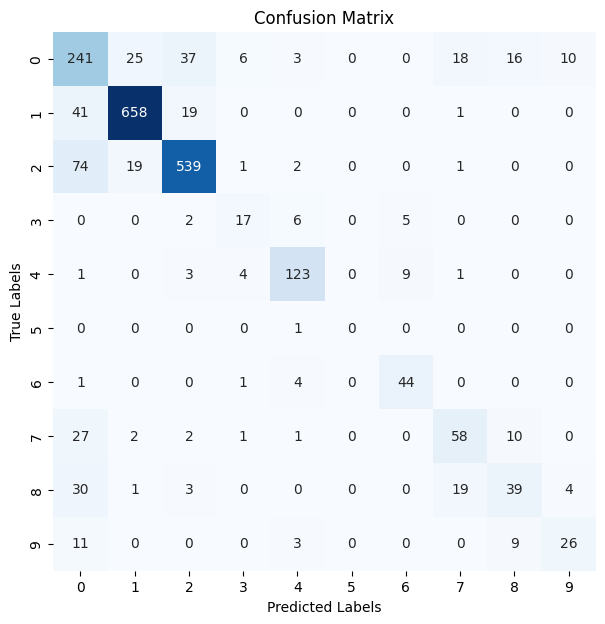

In [ ]:
plt.figure(figsize=(7, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

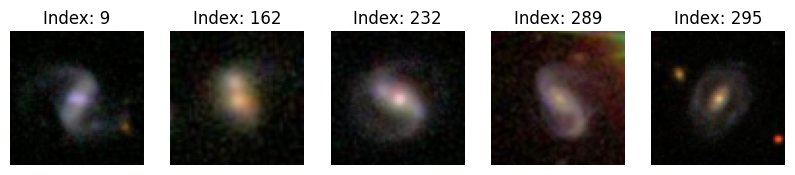

In [ ]:
class_zero_indices = np.where(predicted_labels == 9)[0]

# 设置显示的图像数量
num_images_to_show = 5

# 创建一个图形和子图
fig, axes = plt.subplots(1, num_images_to_show, figsize=(10, 2))

for i, ax in enumerate(axes):
    if i < len(class_zero_indices):
        # 获取对应索引的图像
        img_index = class_zero_indices[i]
        ax.imshow(test_images[img_index])
        ax.set_title(f'Index: {img_index}')
        ax.axis('off')
    else:
        ax.axis('off')  # 如果没有足够的图像，隐藏多余的轴

plt.show()


array([[[ 8.,  8.,  6.],
        [ 5.,  5.,  4.],
        [ 4.,  4.,  4.],
        ...,
        [ 5.,  5.,  3.],
        [ 5.,  5.,  3.],
        [ 5.,  5.,  3.]],

       [[ 4.,  7.,  4.],
        [ 3.,  6.,  3.],
        [ 5.,  7.,  5.],
        ...,
        [ 6.,  3.,  1.],
        [ 8.,  5.,  2.],
        [ 9.,  5.,  3.]],

       [[ 1.,  3.,  1.],
        [ 2.,  5.,  2.],
        [ 4.,  6.,  3.],
        ...,
        [ 8.,  3.,  1.],
        [ 7.,  2.,  0.],
        [ 8.,  4.,  1.]],

       ...,

       [[ 8.,  9.,  4.],
        [ 7.,  7.,  4.],
        [ 8.,  8.,  6.],
        ...,
        [ 7., 10.,  5.],
        [ 7.,  9.,  4.],
        [ 8.,  9.,  4.]],

       [[ 6.,  5.,  2.],
        [ 6.,  6.,  3.],
        [ 7.,  7.,  5.],
        ...,
        [ 5.,  7.,  2.],
        [ 6.,  7.,  3.],
        [ 7.,  7.,  3.]],

       [[10.,  9.,  5.],
        [ 9.,  7.,  5.],
        [ 8.,  8.,  6.],
        ...,
        [ 6.,  6.,  2.],
        [ 8.,  7.,  3.],
        [ 9.,  5.,  3.]]